<a href="https://colab.research.google.com/github/moh2-lh/moh2-lh/blob/main/Copy_of_05_Advanced_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© 2021 Zaka AI, Inc. All Rights Reserved

# Advanced concepts

**Objective:** The goal of this notebook is to go over the advanced concepts that were discussed in the chapter and see them in action. 

Each block will cover a different concept and blocks are not related. 

The required libraries for this exercise are `Keras` for building and training the DL model, `Numpy` for numerical handling and loading of the dataset and `scikit-learn` for validation and datasplit.

##Load Data

In [1]:
# clone git repo
!git clone https://github.com/zaka-ai/intro2dl.git

# change directory
%cd intro2dl/data/

Cloning into 'intro2dl'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 1), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.
/content/intro2dl/data


## Save / Load models

### Train model and save it to disk

In this example, we will create a Keras sequential model, fit this model on the Pima Indians Diabetes dataset, then serialize the model to JSON format and save it along with the weights on the disk. 

We will later see how we can load the model from disk, apply the weights and resume work as normal.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json
import numpy

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create Sequential model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model using Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model on training data
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

accuracy: 77.73%
Saved model to disk


### Load model from disk and use it

After the model was serialized to JSON format and saved on the disk, we can use the `model_from_json` function to load the model's architecture again and then load the weights using `load_weights` function. 

Once the model's topology is defined and the weights are loaded, we can use the model for evaluation but we have to make sure to compile it first!

In [3]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# don't forget to compile the model!
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# evaluate loaded model on training data
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 77.73%


## Checkpoint Neural Network Model Improvements

Let's start by importing the necessary libraries, loading the Pima Indians dataset and then splitting the data into input variables (X) and output variable (Y).

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

Let's define a `create_model` function to create and return the model.


In [5]:
def create_model():
  # create model
  model = Sequential()
  model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

Initialize the ModelCheckpoint callback and pass it to the `model.fit()` function

In [7]:
# define the checkpoint's name that includes the index of the epoch and the validation accuracy
filepath="weights_best.hdf5"

# create an instance of ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# create the model
model = create_model()

# fit the model with the callbacks list
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=10, callbacks=callbacks_list, verbose=0)



Epoch 00001: val_accuracy improved from -inf to 0.67323, saving model to weights_best.hdf5

Epoch 00002: val_accuracy did not improve from 0.67323

Epoch 00003: val_accuracy improved from 0.67323 to 0.68110, saving model to weights_best.hdf5

Epoch 00004: val_accuracy did not improve from 0.68110

Epoch 00005: val_accuracy did not improve from 0.68110

Epoch 00006: val_accuracy did not improve from 0.68110

Epoch 00007: val_accuracy did not improve from 0.68110

Epoch 00008: val_accuracy did not improve from 0.68110

Epoch 00009: val_accuracy did not improve from 0.68110

Epoch 00010: val_accuracy did not improve from 0.68110

Epoch 00011: val_accuracy did not improve from 0.68110

Epoch 00012: val_accuracy did not improve from 0.68110

Epoch 00013: val_accuracy did not improve from 0.68110

Epoch 00014: val_accuracy did not improve from 0.68110

Epoch 00015: val_accuracy improved from 0.68110 to 0.68898, saving model to weights_best.hdf5

Epoch 00016: val_accuracy did not improve fro

## Checkpoint Best Neural Network Model Only

Instead of saving a new copy of the model every time the monitored value improves, we can save only 1 model checkpoint by specifying a fixed name for the checkpoint. 

In [8]:
# fixed checkpoint name
filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# create the model
model = create_model()

# fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.67323, saving model to weights_best.hdf5

Epoch 00002: val_accuracy did not improve from 0.67323

Epoch 00003: val_accuracy did not improve from 0.67323

Epoch 00004: val_accuracy did not improve from 0.67323

Epoch 00005: val_accuracy improved from 0.67323 to 0.70079, saving model to weights_best.hdf5

Epoch 00006: val_accuracy did not improve from 0.70079

Epoch 00007: val_accuracy did not improve from 0.70079

Epoch 00008: val_accuracy improved from 0.70079 to 0.70866, saving model to weights_best.hdf5

Epoch 00009: val_accuracy improved from 0.70866 to 0.71654, saving model to weights_best.hdf5

Epoch 00010: val_accuracy did not improve from 0.71654

Epoch 00011: val_accuracy did not improve from 0.71654

Epoch 00012: val_accuracy did not improve from 0.71654

Epoch 00013: val_accuracy did not improve from 0.71654

Epoch 00014: val_accuracy did not improve from 0.71654

Epoch 00015: val_accuracy did not improve from 0.71654

Epoch 

## Load and use weights from a checkpoint

Now that we have saved the best model weights, let's see how we can load and re-use them.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

# create model with same architecture!
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# load best weights
model.load_weights("weights_best.hdf5")

# compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Created model and loaded weights from file
accuracy: 70.44%


## Visualize model training history

Another concept discussed in this lesson is the model training history. When calling the `model.fit()` function, we can retrieve the training history and use that to visualize the training process.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


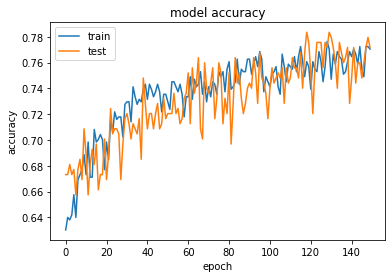

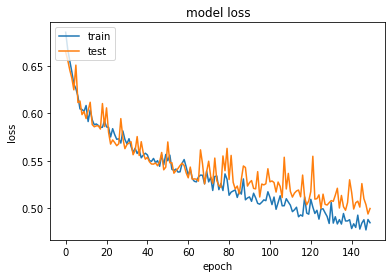

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model and retrieve the training history
training_history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(training_history.history.keys())

# summarize history for training and validation accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Time-based Learning rate schedule

Adjusting the learning rate while training can lead to better convergence of the model. One method that was covered in the lesson's slides is the Time-based learning rate schedule. 

To achieve that, we can create an instance of the SGD (Stochastic Gradient Descent) class and customize the parameters. Specifically, we have to set the `decay_rate` parameter to have the value of `learning_rate / epochs` which will guarantee that our learning rate will reach 0 when the training finishes.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# define the SGD's parameters
epochs = 50
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.01

# create a new instance of SGD class with custom parameters
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# compile model while passing the custom SGD class
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=10, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
52/52 [==============================] - 1s 5ms/step - loss: 7.6279 - accuracy: 0.5195 - val_loss: 16.7484 - val_accuracy: 0.6732
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 5.0835 - accuracy: 0.5467 - val_loss: 1.7834 - val_accuracy: 0.6181
Epoch 3/50
52/52 [==============================] - 0s 2ms/step - loss: 2.3861 - accuracy: 0.6070 - val_loss: 2.3132 - val_accuracy: 0.6181
Epoch 4/50
52/52 [==============================] - 0s 2ms/step - loss: 2.5435 - accuracy: 0.5759 - val_loss: 2.3704 - val_accuracy: 0.6339
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 2.1009 - accuracy: 0.5700 - val_loss: 2.1458 - val_accuracy: 0.6575
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 1.9209 - accuracy: 0.5681 - val_loss: 1.3196 - val_accuracy: 0.5354
Epoch 7/50
52/52 [==============================] - 0s 2ms/step - loss: 1.5049 - accuracy: 0.5973 - val_loss: 1.4919 - val_accuracy: 0.6575
Epoch 8/50
52/52 [=